In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/NLP /Code and Data/spam.csv")
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
spam_sms = " ".join(df[df["Category"] == "spam"]["Message"])
non_spam_sms = " ".join(df[df["Category"] == "not spam"]["Message"])

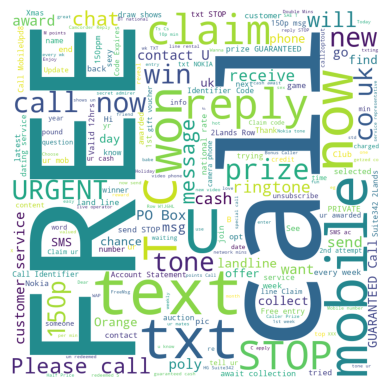

In [5]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(spam_sms)

plt.imshow(wc)
plt.axis("off")
plt.show()

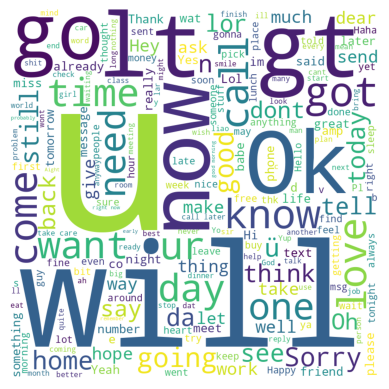

In [6]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(non_spam_sms)

plt.imshow(wc)
plt.axis("off")
plt.show()

In [7]:
le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# feature and target
# train test spilt

X = df["Message"]
y = df["Category"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(stop_words="english") 
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [11]:
X_train_cv

<3900x6901 sparse matrix of type '<class 'numpy.int64'>'
	with 30085 stored elements in Compressed Sparse Row format>

In [12]:
# train
dt = DecisionTreeClassifier()
dt.fit(X_train_cv,y_train)

DecisionTreeClassifier()

In [13]:
# prediction
y_pred = dt.predict(X_test_cv)

In [14]:
# evaluation
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1442
           1       0.91      0.85      0.88       230

    accuracy                           0.97      1672
   macro avg       0.94      0.92      0.93      1672
weighted avg       0.97      0.97      0.97      1672



In [15]:
sms1 = "Hey, how are you, call in the evening"
sms2 = "Hi, let's catch up tonight"
sms3 = "FREE gifts worth 100 dollar, claim it"
sms4 = "Apply for loan at minimum interest rate, click on the link below"

In [16]:
def predict_spam_sms(sms):
  sms_cv = cv.transform([sms])
  prediction = dt.predict(sms_cv)
  return le.inverse_transform(prediction)[0]

In [17]:
predict_spam_sms(sms1)

'not spam'

In [18]:
predict_spam_sms(sms2)

'not spam'

In [19]:
predict_spam_sms(sms3)

'spam'

In [20]:
predict_spam_sms(sms4)

'not spam'

## TF-IDF Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [25]:
X_train_tfidf 

<3900x6901 sparse matrix of type '<class 'numpy.float64'>'
	with 30085 stored elements in Compressed Sparse Row format>

In [26]:
# train
dt2 = DecisionTreeClassifier()
dt2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dt2.predict(X_test_tfidf)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1442
           1       0.91      0.83      0.87       230

    accuracy                           0.96      1672
   macro avg       0.94      0.91      0.92      1672
weighted avg       0.96      0.96      0.96      1672



In [29]:
def predict_spam_sms_tfidf(sms):
  sms_cv = tfidf.transform([sms])
  prediction = dt2.predict(sms_cv)
  return le.inverse_transform(prediction)[0]

In [30]:
predict_spam_sms_tfidf(sms1)

'not spam'

In [31]:
predict_spam_sms_tfidf(sms2)

'not spam'

In [32]:
predict_spam_sms_tfidf(sms3)

'spam'

In [33]:
predict_spam_sms_tfidf(sms4)

'not spam'